<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [33]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [47]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [48]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [36]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Question_1

We start with the visualizations for the question:

Therefore we:

1. For the "Median value of owner-occupied homes" provide a boxplot
2. Provide a  bar plot for the Charles river variable

In [37]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


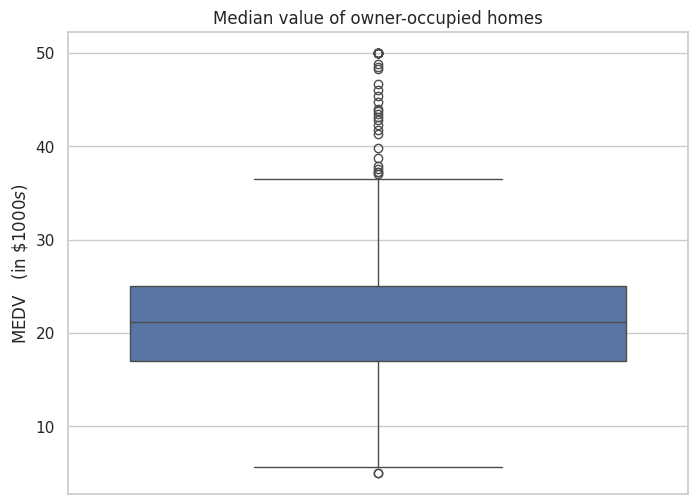

In [38]:

plt.figure(figsize=(8, 6))
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.ylabel(r'MEDV   (in $\$1000s$)')
plt.title('Median value of owner-occupied homes')
plt.show()

Here I have plotted a boxplot of the median value for owner-occupied houses, the y-axis is in 1000 dollars. We see that the median value for owner-occupied houses is at around 21000 dollars. There are some outliers mostly in the higher value region. In order to set these values in comparison to the houses bounded to the Charles river we can first find out more about the Charles river variable.

## Provide a bar plot for the Charles river variable

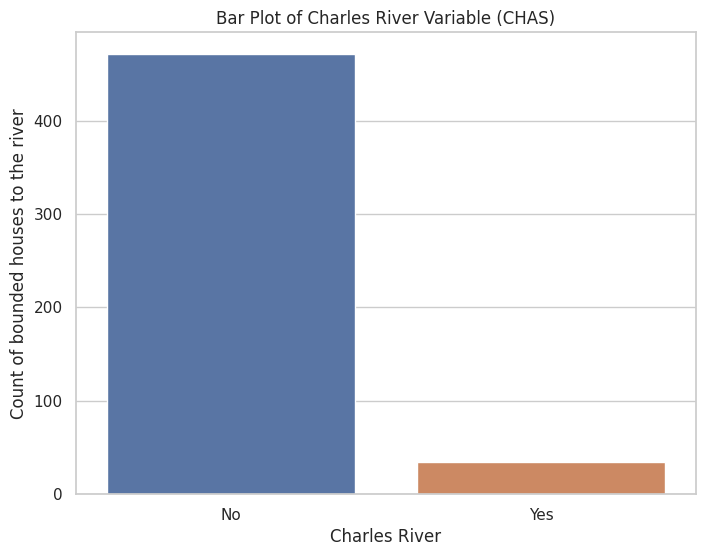

In [39]:

sns.set(style='whitegrid')
chas_counts = boston_df['CHAS'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=chas_counts.index, y=chas_counts.values, hue = chas_counts.index, legend = False)
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('Charles River')
plt.ylabel('Count of bounded houses to the river')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Change x-tick labels for clarity
plt.show()


In the upper figure for the Charles River Variable it is plotted as a bar plot, how many houses are bounded by the Charles river (Yes) or not (No). We obtain that there are way more houses not being bounded by the river then there are houses which bound by the river.

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

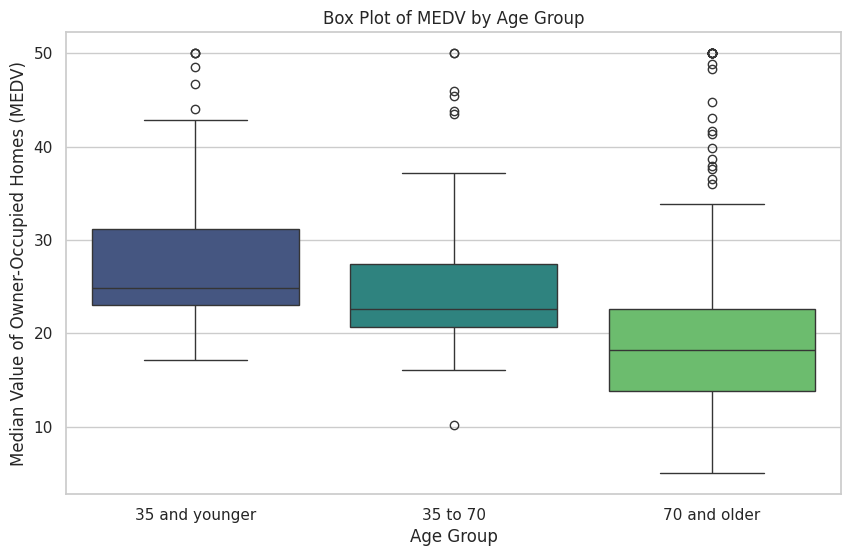

In [40]:

bins = [0, 35, 70, 100]  
labels = ['35 and younger', '35 to 70', '70 and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)


sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='viridis', hue = 'AGE_GROUP', legend = False )
plt.title('Box Plot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.show()

We see that for ages younger than 35 years higher values of houses are reached, than for a higher age.

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

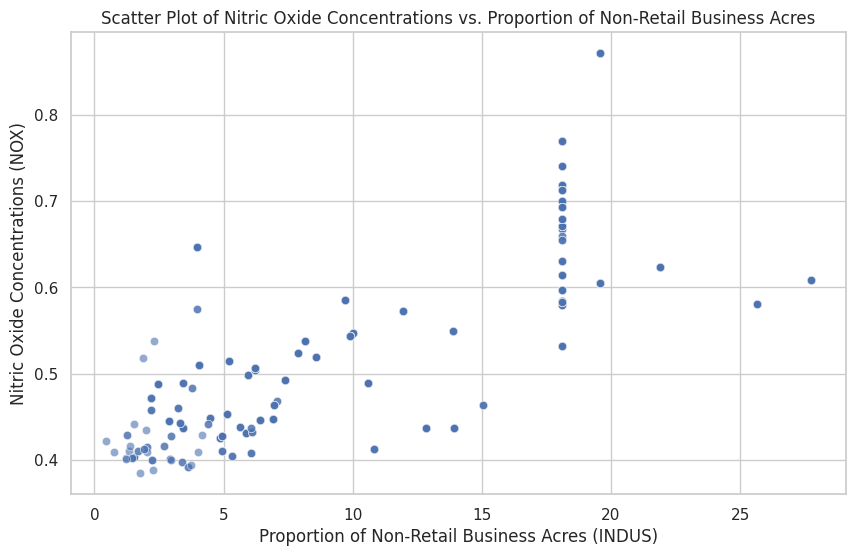

In [41]:

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'], alpha=0.6)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
##plt.axhline(boston_df['NOX'].mean(), color='red', linestyle='dashed', linewidth=1, label = 'Mean_NOX')
##plt.axvline(boston_df['INDUS'].mean(), color='blue', linestyle='dashed', linewidth=1, label = 'Mean_INDUS')
##plt.legend()
plt.show()

As one can see there is possibly a positive correlation between the INDUS and NOX, but for further analyses and support other statistical methods are of need.

## Create a histogram for the pupil to teacher ratio variable

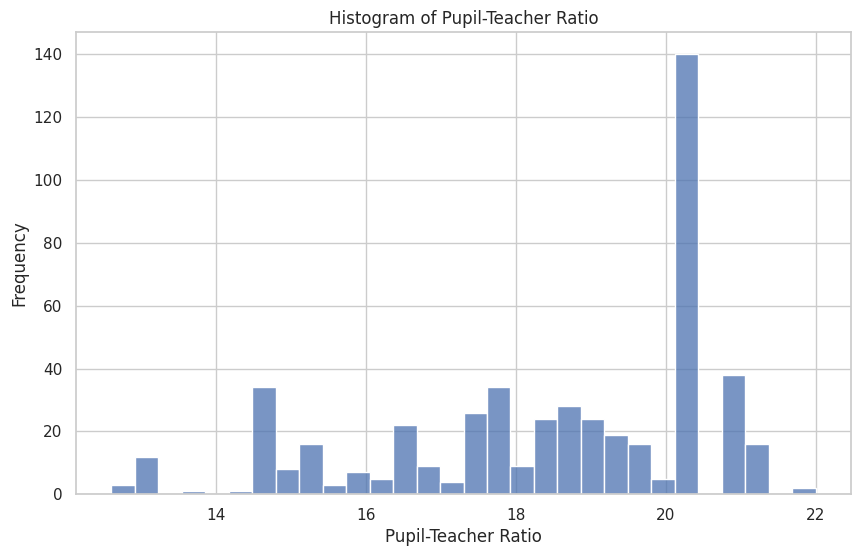

In [42]:

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=30, kde=False) 
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
#plt.axvline(boston_df['PTRATIO'].mean(), color='red', linestyle='dashed', linewidth=1, label = 'mean')
#plt.axvline(boston_df['PTRATIO'].median(), color='blue', linestyle='dashed', linewidth=1, label = 'median')
#plt.legend()
plt.show()

In the above histogramm the pupil-teacher ratio and its freqeuncy are plotted. A higher pupil-teacher ration comes with higher frequency. This is true for the range where the ratio is under approx. 20, after that the freqeuncy falls down again.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) 

H_0 : Null hypothesis: There is no significant difference in the median house values, medv_1 = medv_2, where medv_1 are the houses bounded by the river and medv_2 not bounded \
H_a : altenative hypothesis: There is a significant difference in the median house values, medv_1 != medv_2

In [43]:

medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV'] 
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV'] 

from scipy import stats

#t-test
t_stat, p_value = stats.ttest_ind(medv_chas_1, medv_chas_0)

# Display results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


Conclusion: \
Because the P-value is way below our set alpha of 0.05, we reject the null hypothesis and come to the conclusion that there is a significant difference in median house values. We have strong evidence to conclude that there is a significant difference in the median value of houses bounded by the Charles River compared to those that are not.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H_0 : Null hypothesis: There is no difference in the median values of houses (MEDV) \
H_A : alternative hypothesis: There is a significant difference

In [44]:

f_stat, p_value = stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '35 to 70']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '70 and older']['MEDV']
)

print(f'F-statistic: {f_stat:.3f}')
print(f'P-value: {p_value}')


F-statistic: 36.408
P-value: 1.7105011022702984e-15


Conclusion: \
This p-value is very small (less than 0.05). It means that if there were truly no difference in median house values between the different age groups, there's a very low probability (almost 0%) of observing differences as extreme as the ones we found in our sample. As the p-value is below alpha of 0.05, we reject the null hypothesis and therefore we find that there exists a significant difference in the median value of houses for each proportion of owner occupied units built prior to 1940.

## Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town \
Alternative Hypothesis: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [45]:
# Pearson correlation between NOX and INDUS
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion:  \
With a value of approx. 0.76 we have a strong positive relation between the two variables as can be also observed in the visualization made earlier on. Also the pvalue is below 0.05 therefore the null hypothesis is rejected and we find a significant correlation.

## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H_0 : null hypothesis: There is no impact of an additional distance to the employment centres \
H_A: alternative hypothesis: There is an impact of an additional weighted distance to the five employment centres

In [46]:
X = boston_df['DIS']  # Independent variable
y = boston_df['MEDV']  # Dependent variable

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        16:00:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

As the coefficient is positive, it suggests that homes further from employment centers have higher values. Specifically, the coef DIS of 1.0916 indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1091.6 (as the MEDV is in 1000's) the median value of owner occupied homes. \

The R-squared of 0.062 means that approximately 6.2% of the variation in median home values (MEDV) can be explained by the weighted distance to the five Boston employment centers (DIS). This is a relatively low R-squared value, suggesting that distance alone doesn't explain a large portion of the variation in house prices. Adjusted R-squared: 0.061 Similar to R-squared, but adjusted for the number of variables in the model. F-statistic: 33.58 This tests the overall significance of the model. The associated p-value (1.21e-08) is very low, indicating that the model is statistically significant and we need to reject the null hypothesis of no impact.

Conclusion: \
The regression analysis indicates that there is a statistically significant positive relationship between the weighted distance to employment centers and the median value of owner-occupied homes in Boston. However, distance alone explains only a small portion of the variation in house prices.

